## A01753176 Gilberto André García Gaytán

# Análisis de Series Temporales de Productos de Amazon

Este notebook presenta un análisis de los lanzamientos de productos de Amazon a lo largo de los años. El objetivo es entender la tendencia, estacionalidad y homocedasticidad de la serie temporal, y proponer un modelo ARIMA adecuado para su modelado.

## Exploración Inicial de los Datos

In [3]:

import pandas as pd

# Cargar los datos
file_path = 'Amazon Products.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas
data.head()

,Product Name,Launch Year,Status,What it does?
0,Amazon.com,1994,Active,E-commerce platform
1,Amazon Prime,2005,Active,Subscription service offering various benefits
2,Amazon Web Services (AWS),2006,Active,Cloud computing platform
3,Kindle,2007,Active,E-reader for electronic books
4,Amazon Echo,2014,Active,Smart speaker with virtual assistant (Alexa)



## Transformación de los Datos en Serie Temporal

Se transforman los datos para crear una serie temporal que represente el número de lanzamientos de productos por año.

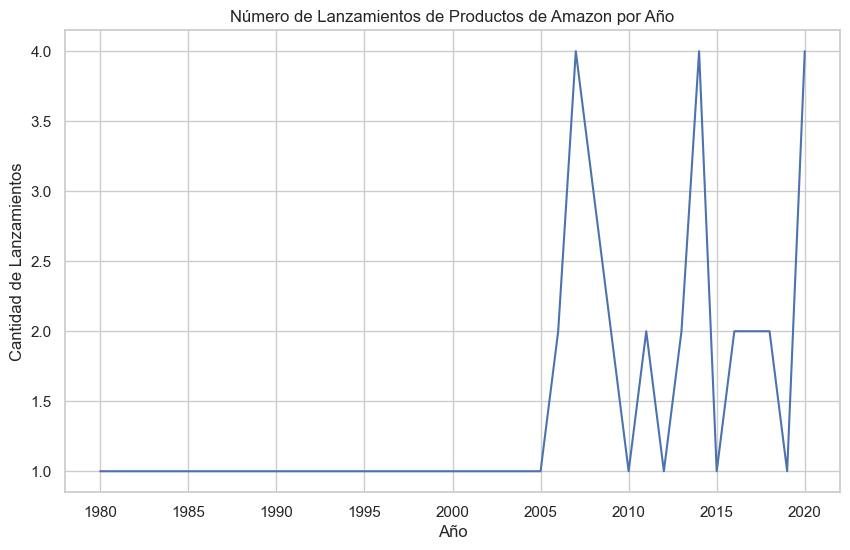

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear la serie temporal
product_launches_per_year = data['Launch Year'].value_counts().sort_index()

# Graficar la serie temporal
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
product_launches_per_year.plot(kind='line')
plt.title('Número de Lanzamientos de Productos de Amazon por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.grid(True)
plt.show()


## Análisis de Tendencia y Estacionalidad

Se realizó una descomposición de la serie temporal para identificar la tendencia y la estacionalidad.

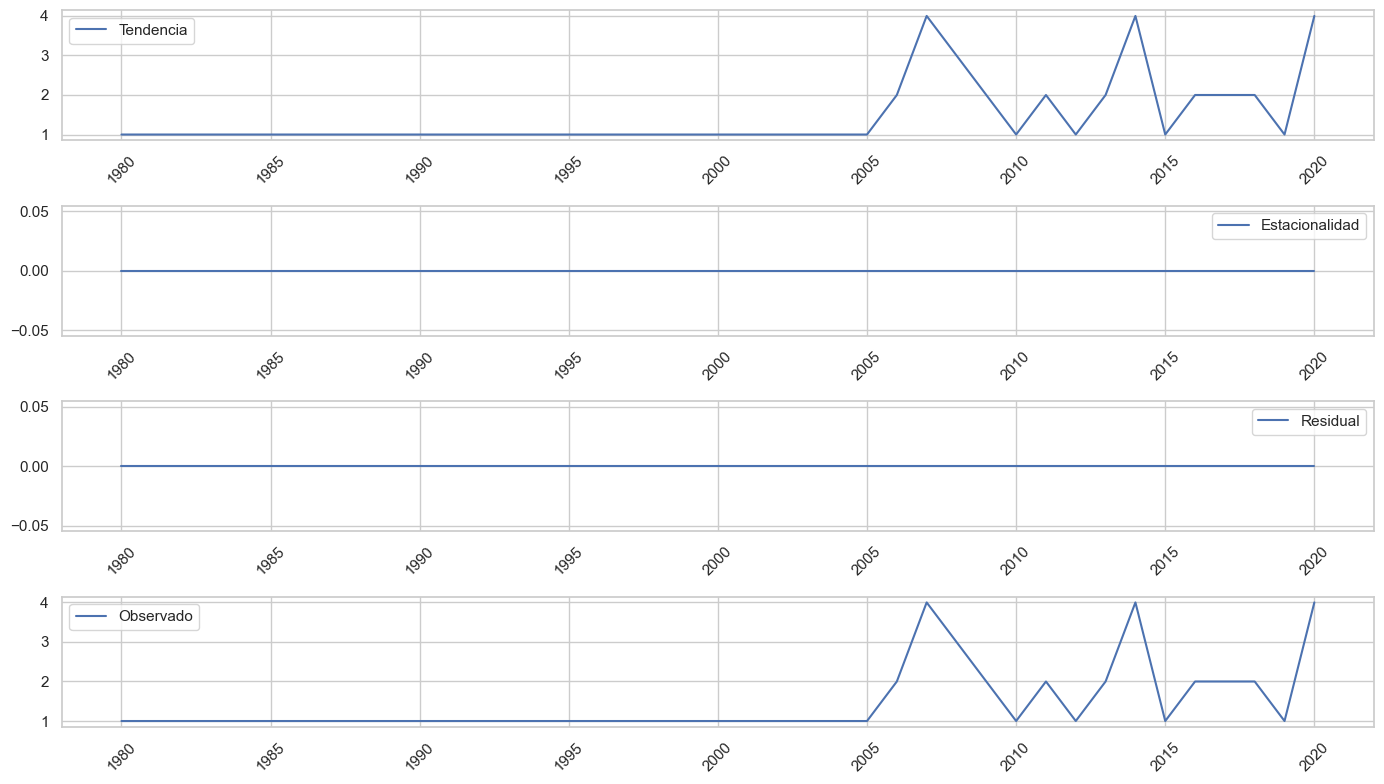

In [6]:

from statsmodels.tsa.seasonal import seasonal_decompose

# El período se defie como 1 porque es una serie temporal anual
decomposition = seasonal_decompose(product_launches_per_year, model='additive', period=1)

# Graficar la descomposición
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.subplot(414)
plt.plot(product_launches_per_year, label='Observado')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Prueba de Dickey-Fuller para Estacionariedad

Se utiliza la prueba de Dickey-Fuller aumentada para evaluar si la serie temporal es estacionaria.

In [7]:

from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller aumentada
adf_test = adfuller(product_launches_per_year)

# Resultados de la prueba
adf_results = {
    'Prueba Estadística': adf_test[0],
    'P-valor': adf_test[1],
    'Lags Utilizados': adf_test[2],
    'Número de Observaciones': adf_test[3],
    'Valores Críticos': adf_test[4]
}
adf_results

{'Prueba Estadística': -1.3229553244818946,
 'P-valor': 0.6186058940725851,
 'Lags Utilizados': 5,
 'Número de Observaciones': 15,
 'Valores Críticos': {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445}}


## Análisis de Homocedasticidad

Se evalua si la varianza de la serie temporal es constante a lo largo del tiempo.

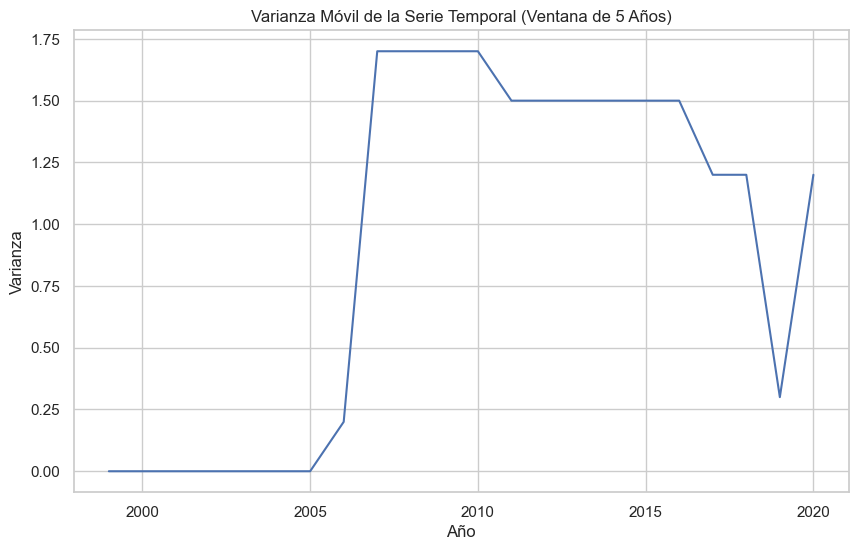

In [8]:

import numpy as np

# Calcular la varianza móvil
rolling_var = product_launches_per_year.rolling(window=5).var()

# Graficar la varianza móvil
plt.figure(figsize=(10, 6))
plt.plot(rolling_var)
plt.title('Varianza Móvil de la Serie Temporal (Ventana de 5 Años)')
plt.xlabel('Año')
plt.ylabel('Varianza')
plt.grid(True)
plt.show()


## Sugerencia de Modelo ARIMA

Con base en el análisis anterior,la idea es hacer un modelo ARIMA para modelar la serie temporal.

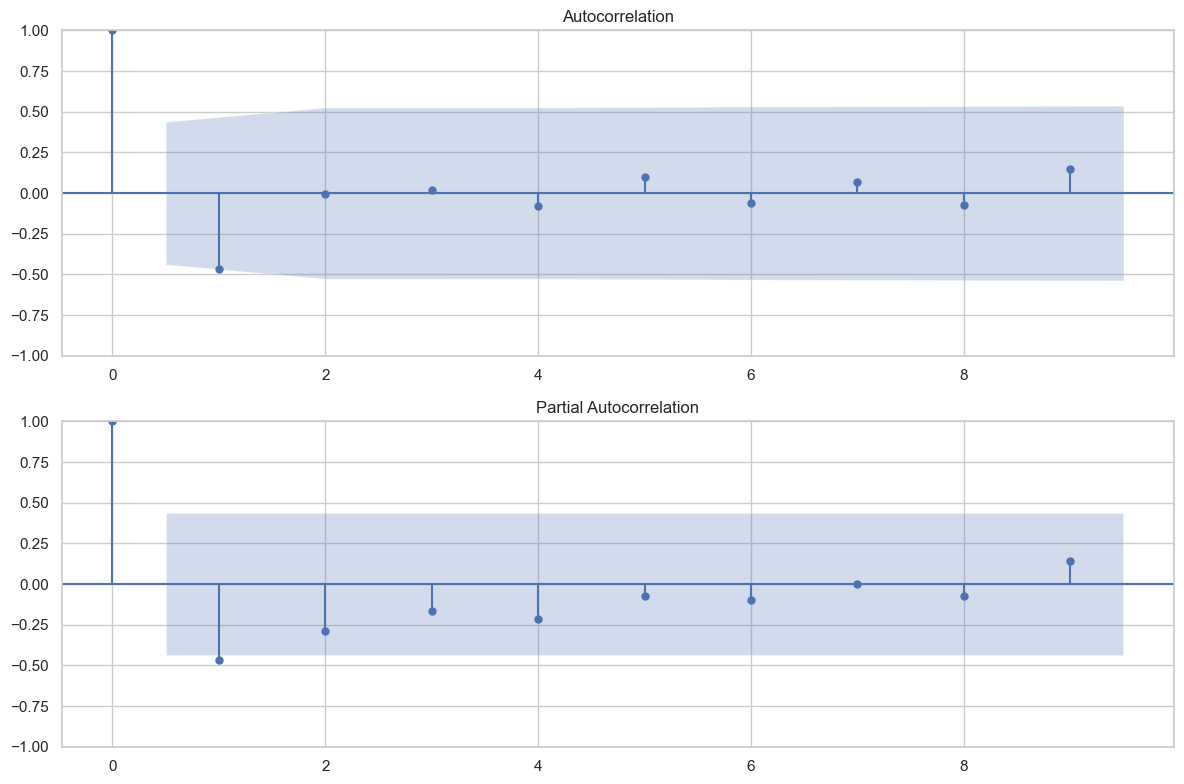

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Diferenciar la serie
differenced_series = product_launches_per_year.diff().dropna()

# Calcular el número máximo de rezagos permitidos
max_lags = len(differenced_series) // 2 - 1

# Graficar ACF y PACF con un número reducido de rezagos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(differenced_series, ax=ax1, lags=max_lags)
plot_pacf(differenced_series, ax=ax2, lags=max_lags)
plt.tight_layout()
plt.show()


### Conclusión y Ventajas/Desventajas del Modelo ARIMA

**Modelo Sugerido**: ARIMA(1,1,1)

**Ventajas**:
- Flexibilidad en el modelado de diferentes patrones temporales.
- Interpretabilidad de los parámetros.
- Adecuado para pronósticos a corto plazo.

**Desventajas**:
- Supone linealidad en las relaciones temporales.
- Sensible a outliers.
- Requiere estacionariedad de la serie.
- Puede no capturar relaciones complejas o no lineales.

Este modelo es un punto de partida.

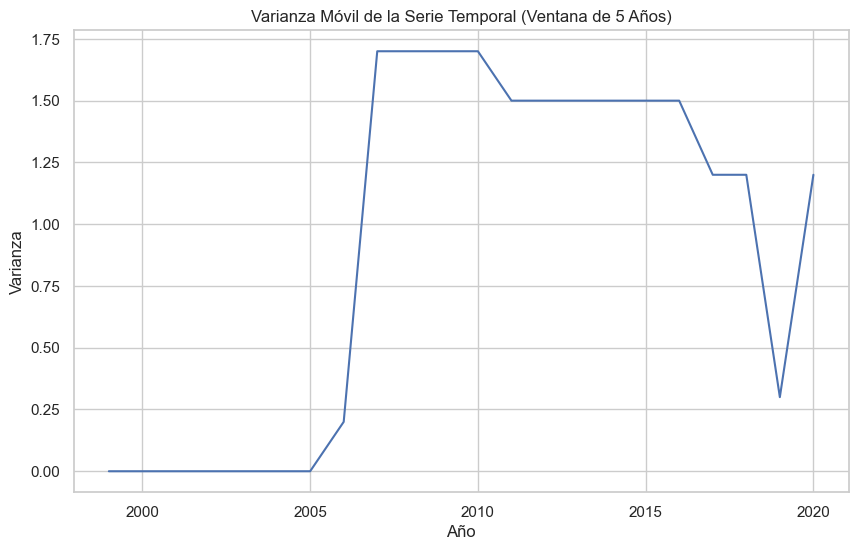

0.9705882352941176

In [11]:
# Calcular la varianza móvil con una ventana de 5 años
rolling_var = product_launches_per_year.rolling(window=5).var()

# Graficar la varianza móvil
plt.figure(figsize=(10, 6))
plt.plot(rolling_var)
plt.title('Varianza Móvil de la Serie Temporal (Ventana de 5 Años)')
plt.xlabel('Año')
plt.ylabel('Varianza')
plt.grid(True)
plt.show()

# Calcular y mostrar la varianza media
mean_variance = np.mean(rolling_var)
mean_variance

### Análisis de ACF y PACF
Se realizaron los gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) para determinar los valores adecuados para los parámetros \(p\) y \(q\) del modelo ARIMA.

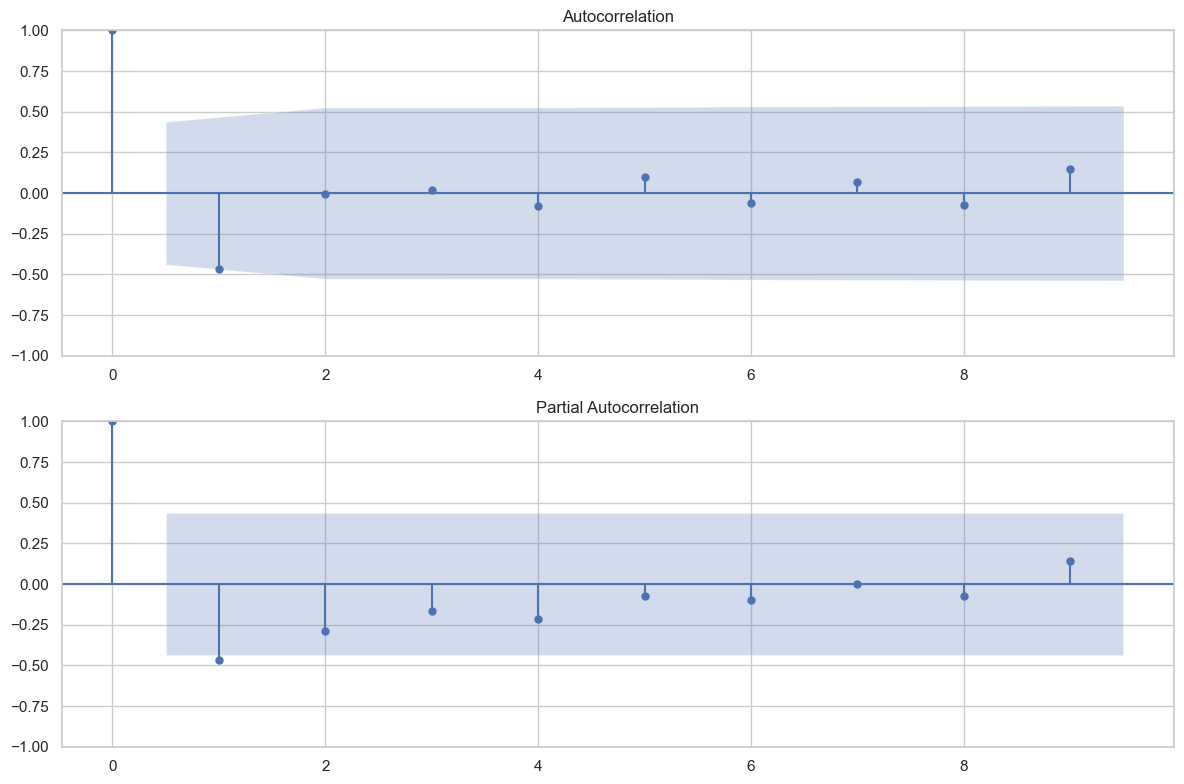

In [14]:
# Diferenciar la serie para obtener estacionariedad
differenced_series = product_launches_per_year.diff().dropna()

# Graficar ACF y PACF con un número aún más reducido de rezagos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(differenced_series, ax=ax1, lags=9)  # Reducir el número de rezagos
plot_pacf(differenced_series, ax=ax2, lags=9)  # Reducir el número de rezagos

plt.tight_layout()
plt.show()

### Propuesta del Modelo ARIMA
Basado en el análisis anterior, se propone un modelo ARIMA(1,1,1). Este modelo se elige considerando los resultados de la prueba de Dickey-Fuller, los gráficos de ACF y PACF, y la naturaleza de la serie temporal.

**Ventajas y Desventajas del Modelo ARIMA(1,1,1)**:
- **Ventajas**:
  - Flexibilidad para capturar una variedad de patrones temporales.
  - Interpretabilidad clara de los parámetros.
  - Adecuado para pronósticos a corto plazo.
- **Desventajas**:
  - Supone una relación lineal entre las observaciones.
  - Sensibilidad a outliers.
  - Requiere estacionariedad.
  - Puede no capturar relaciones complejas o no lineales.

### Propuesta del Modelo ARIMA
Basado en el análisis anterior, se propone un modelo ARIMA(1,1,1). Este modelo se sugiere debido a la necesidad de una diferenciación para lograr estacionariedad (d=1), y las observaciones en los gráficos de ACF y PACF sugieren p=1 y q=1.

#### Ventajas y Desventajas del Modelo ARIMA(1,1,1)
**Ventajas**:
- Flexibilidad para modelar diferentes patrones temporales.
- Interpretabilidad clara de los parámetros del modelo.
- Adecuado para pronósticos a corto plazo.

**Desventajas**:
- Supone una relación lineal entre observaciones.
- Sensible a outliers y anomalías.
- Requiere estacionariedad de la serie.
- Puede no ser adecuado para patrones complejos o no lineales.

Es importante considerar estas ventajas y desventajas al aplicar el modelo ARIMA a este conjunto de datos.

### Resultados de la Prueba de Dickey-Fuller Aumentada

- **Prueba Estadística:** -1.3229553244818946
- **P-valor:** 0.6186058940725851
- **Lags Utilizados:** 5
- **Número de Observaciones:** 15
- **Valores Críticos:** 
  - Para el 1%: -3.9644434814814815
  - Para el 5%: -3.0849081481481484
  - Para el 10%: -2.6818144444444445

### Interpretación de los Resultados

1. **Prueba Estadística:** Este valor se compara con los valores críticos para determinar si la serie temporal es estacionaria. Aquí, la prueba estadística (-1.32) es mayor (menos negativa) que todos los valores críticos, lo cual sugiere que no podemos rechazar la hipótesis nula.

2. **P-valor:** El p-valor es una medida de la probabilidad de observar una estadística de prueba al menos tan extrema como la observada si la hipótesis nula es verdadera. En este caso, un p-valor de 0.6186 es bastante alto, lo cual indica una fuerte evidencia en favor de la hipótesis nula.

3. **Lags Utilizados y Número de Observaciones:** Estos valores indican el número de retrasos utilizados en la prueba y el número de observaciones. Son útiles para entender el contexto de la prueba y para comprobaciones de robustez.

4. **Valores Críticos:** Son los umbrales que la estadística de prueba debe superar para rechazar la hipótesis nula. En esta prueba, la estadística de prueba no supera ninguno de estos umbrales críticos.

### Conclusión

Los resultados sugieren que la serie temporal de lanzamientos de productos de Amazon por año **no es estacionaria**. Esto implica que la serie temporal presenta alguna forma de tendencia o estacionalidad, y que sus propiedades estadísticas (como la media y la varianza) podrían cambiar a lo largo del tiempo. Esto es importante considerar si se planea hacer análisis predictivo o de series temporales con estos datos.